In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input

import cv2
import os
import numpy as np

import tensorflow as tf

2022-04-14 18:04:12.268497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-14 18:04:12.268534: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# dataset from keras
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
# load your dataset here
def load_data(path):
    images = [os.path.join(path, i) for i in os.listdir(path) if i.endswith(".jpg") or i .endswith(".png")]
    images = [cv2.imread(image_path) for image_path in images]
    images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]
    images = [cv2.resize(image, (28, 28)) for image in images]
    return np.array(images)

#X_train = load_data('H:/Datasets/Face dataset/WIDER_val/images/0--Parade')

In [4]:
X_train.shape

(60000, 28, 28)

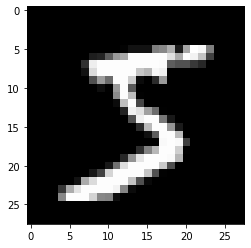

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gray')

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
# Model
input_layer = Input(shape = (28,28,1))

# encoder
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_layer)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

# decoder
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation = 'relu', padding = 'same')(x)

2022-04-14 18:11:45.024669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hassanmehmood/Desktop/random_python_experiment/general_venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-14 18:11:45.024732: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-14 18:11:45.024781: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hassanmehmood-HP-Pavilion-dv6-Notebook-PC): /proc/driver/nvidia/version does not exist


In [9]:
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [10]:
# compile
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [11]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size = 128, validation_data=(X_test,X_test))

2022-04-14 18:13:18.422344: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-04-14 18:13:19.128403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
  1/469 [..............................] - ETA: 11:02 - loss: 2.0529

2022-04-14 18:13:21.089466: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31610880 exceeds 10% of free system memory.
2022-04-14 18:13:21.089553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31610880 exceeds 10% of free system memory.
2022-04-14 18:13:21.153963: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24159744 exceeds 10% of free system memory.


469/469 [==============================] - 83s 174ms/step - loss: 0.2682 - val_loss: 0.1959
Epoch 2/20
469/469 [==============================] - 68s 145ms/step - loss: 0.2008 - val_loss: 0.1938
Epoch 3/20
469/469 [==============================] - 82s 176ms/step - loss: 0.1903 - val_loss: 0.1784
Epoch 4/20
469/469 [==============================] - 100s 214ms/step - loss: 0.1868 - val_loss: 0.1741
Epoch 5/20
469/469 [==============================] - 107s 227ms/step - loss: 0.1829 - val_loss: 0.4565
Epoch 6/20
469/469 [==============================] - 108s 230ms/step - loss: 0.1921 - val_loss: 0.1704
Epoch 7/20
469/469 [==============================] - 108s 230ms/step - loss: 0.1733 - val_loss: 0.1722
Epoch 8/20
469/469 [==============================] - 155s 332ms/step - loss: 0.1654 - val_loss: 0.1555
Epoch 9/20
469/469 [==============================] - 189s 402ms/step - loss: 0.1928 - val_loss: 0.1859
Epoch 10/20
469/469 [==============================] - 193s 412ms/step - loss:

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [13]:
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [14]:
decoder_layer = Input(shape = (4,4,8))

decoder = autoencoder.layers[7](decoder_layer)

for layer in autoencoder.layers[8:]:
    decoder = layer(decoder)

decoder = Model(decoder_layer, decoder, name = 'Decoder')
decoder.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [15]:
# encoder images for testing
encoded_images = encoder.predict(X_test, verbose = 1)
encoded_images.shape

313/313 [==============================] - 2s 7ms/step


(10000, 4, 4, 8)

In [16]:
decoded_images = decoder.predict(encoded_images, verbose=1)
decoded_images.shape

313/313 [==============================] - 3s 9ms/step


(10000, 28, 28, 1)

In [17]:
decoded_images = decoded_images.reshape(decoded_images.shape[0], 28,28)
decoded_images.shape

(10000, 28, 28)

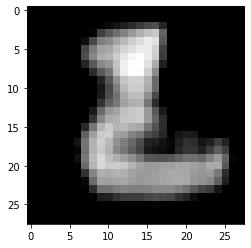

In [18]:
plt.imshow(decoded_images[1], cmap = 'gray')

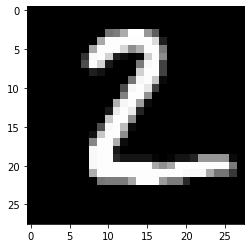

In [19]:
X_test = X_test.reshape(X_test.shape[0], 28,28)
plt.imshow(X_test[1], cmap = 'gray')